## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9969759	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9774046	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9558867	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9392990	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9240248	total: 62.8ms	remaining: 12.5s
5:	learn: 0.9062393	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8905530	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8743713	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8577312	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8408972	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8241624	total: 68.6ms	remaining: 6.17s
11:	learn: 0.8082559	total: 69.6ms	remaining: 5.73s
12:	learn: 0.7940763	total: 70.4ms	remaining: 5.34s
13:	learn: 0.7785124	total: 71.2ms	remaining: 5.01s
14:	learn: 0.7644537	total: 72.2ms	remaining: 4.74s
15:	learn: 0.7503562	total: 73.1ms	remaining: 4.5s
16:	learn: 0.7368139	total: 74ms	remaining: 4.28s
17:	learn: 0.7234012	total: 74.8ms	remaining: 4.08s
18:	learn: 0.7104012	total: 75.6ms	remaining: 3.

58:	learn: 0.4148427	total: 107ms	remaining: 1.71s
59:	learn: 0.4113287	total: 108ms	remaining: 1.7s
60:	learn: 0.4077113	total: 109ms	remaining: 1.68s
61:	learn: 0.4040843	total: 110ms	remaining: 1.67s
62:	learn: 0.4005530	total: 111ms	remaining: 1.65s
63:	learn: 0.3969613	total: 112ms	remaining: 1.64s
64:	learn: 0.3938115	total: 113ms	remaining: 1.63s
65:	learn: 0.3904959	total: 114ms	remaining: 1.62s
66:	learn: 0.3867771	total: 115ms	remaining: 1.6s
67:	learn: 0.3837719	total: 116ms	remaining: 1.59s
68:	learn: 0.3804993	total: 117ms	remaining: 1.58s
69:	learn: 0.3776383	total: 118ms	remaining: 1.57s
70:	learn: 0.3739129	total: 119ms	remaining: 1.56s
71:	learn: 0.3697268	total: 120ms	remaining: 1.54s
72:	learn: 0.3669473	total: 121ms	remaining: 1.53s
73:	learn: 0.3638635	total: 122ms	remaining: 1.52s
74:	learn: 0.3605808	total: 123ms	remaining: 1.51s
75:	learn: 0.3580057	total: 124ms	remaining: 1.5s
76:	learn: 0.3548707	total: 124ms	remaining: 1.49s
77:	learn: 0.3526631	total: 125ms	

156:	learn: 0.2404335	total: 192ms	remaining: 1.03s
157:	learn: 0.2396785	total: 193ms	remaining: 1.03s
158:	learn: 0.2391213	total: 194ms	remaining: 1.02s
159:	learn: 0.2386478	total: 195ms	remaining: 1.02s
160:	learn: 0.2379925	total: 195ms	remaining: 1.02s
161:	learn: 0.2370891	total: 196ms	remaining: 1.01s
162:	learn: 0.2363208	total: 197ms	remaining: 1.01s
163:	learn: 0.2355600	total: 198ms	remaining: 1.01s
164:	learn: 0.2349235	total: 198ms	remaining: 1s
165:	learn: 0.2343863	total: 199ms	remaining: 1s
166:	learn: 0.2336791	total: 200ms	remaining: 999ms
167:	learn: 0.2328636	total: 201ms	remaining: 997ms
168:	learn: 0.2323419	total: 202ms	remaining: 994ms
169:	learn: 0.2316132	total: 203ms	remaining: 991ms
170:	learn: 0.2306961	total: 204ms	remaining: 988ms
171:	learn: 0.2298617	total: 205ms	remaining: 985ms
172:	learn: 0.2290915	total: 206ms	remaining: 983ms
173:	learn: 0.2280004	total: 206ms	remaining: 980ms
174:	learn: 0.2274590	total: 207ms	remaining: 977ms
175:	learn: 0.2269

284:	learn: 0.1698389	total: 297ms	remaining: 746ms
285:	learn: 0.1694961	total: 298ms	remaining: 745ms
286:	learn: 0.1693360	total: 299ms	remaining: 743ms
287:	learn: 0.1686409	total: 300ms	remaining: 742ms
288:	learn: 0.1681123	total: 301ms	remaining: 740ms
289:	learn: 0.1679113	total: 302ms	remaining: 740ms
290:	learn: 0.1676150	total: 303ms	remaining: 738ms
291:	learn: 0.1668990	total: 304ms	remaining: 736ms
292:	learn: 0.1667331	total: 304ms	remaining: 735ms
293:	learn: 0.1661497	total: 305ms	remaining: 733ms
294:	learn: 0.1656425	total: 306ms	remaining: 732ms
295:	learn: 0.1652133	total: 307ms	remaining: 730ms
296:	learn: 0.1648246	total: 308ms	remaining: 729ms
297:	learn: 0.1645843	total: 309ms	remaining: 727ms
298:	learn: 0.1640643	total: 310ms	remaining: 726ms
299:	learn: 0.1635360	total: 310ms	remaining: 724ms
300:	learn: 0.1630620	total: 311ms	remaining: 722ms
301:	learn: 0.1627384	total: 312ms	remaining: 721ms
302:	learn: 0.1621205	total: 313ms	remaining: 719ms
303:	learn: 

386:	learn: 0.1329398	total: 382ms	remaining: 605ms
387:	learn: 0.1325704	total: 383ms	remaining: 604ms
388:	learn: 0.1324116	total: 384ms	remaining: 603ms
389:	learn: 0.1321497	total: 385ms	remaining: 602ms
390:	learn: 0.1318670	total: 386ms	remaining: 600ms
391:	learn: 0.1316093	total: 386ms	remaining: 599ms
392:	learn: 0.1313134	total: 387ms	remaining: 598ms
393:	learn: 0.1310132	total: 388ms	remaining: 597ms
394:	learn: 0.1307313	total: 389ms	remaining: 595ms
395:	learn: 0.1305224	total: 390ms	remaining: 594ms
396:	learn: 0.1300927	total: 391ms	remaining: 593ms
397:	learn: 0.1297763	total: 391ms	remaining: 592ms
398:	learn: 0.1296263	total: 392ms	remaining: 591ms
399:	learn: 0.1294377	total: 393ms	remaining: 590ms
400:	learn: 0.1291851	total: 394ms	remaining: 588ms
401:	learn: 0.1289720	total: 395ms	remaining: 587ms
402:	learn: 0.1286040	total: 396ms	remaining: 586ms
403:	learn: 0.1282823	total: 396ms	remaining: 585ms
404:	learn: 0.1281613	total: 397ms	remaining: 583ms
405:	learn: 

512:	learn: 0.1032922	total: 488ms	remaining: 463ms
513:	learn: 0.1031691	total: 489ms	remaining: 462ms
514:	learn: 0.1030098	total: 490ms	remaining: 461ms
515:	learn: 0.1029091	total: 491ms	remaining: 460ms
516:	learn: 0.1026480	total: 491ms	remaining: 459ms
517:	learn: 0.1023676	total: 492ms	remaining: 458ms
518:	learn: 0.1021725	total: 493ms	remaining: 457ms
519:	learn: 0.1019364	total: 494ms	remaining: 456ms
520:	learn: 0.1018102	total: 495ms	remaining: 455ms
521:	learn: 0.1016280	total: 496ms	remaining: 454ms
522:	learn: 0.1014046	total: 497ms	remaining: 453ms
523:	learn: 0.1011340	total: 497ms	remaining: 452ms
524:	learn: 0.1008932	total: 498ms	remaining: 451ms
525:	learn: 0.1006297	total: 499ms	remaining: 450ms
526:	learn: 0.1004032	total: 500ms	remaining: 449ms
527:	learn: 0.1002472	total: 501ms	remaining: 448ms
528:	learn: 0.0999124	total: 501ms	remaining: 446ms
529:	learn: 0.0996706	total: 502ms	remaining: 445ms
530:	learn: 0.0995333	total: 503ms	remaining: 444ms
531:	learn: 

614:	learn: 0.0857831	total: 573ms	remaining: 359ms
615:	learn: 0.0855839	total: 574ms	remaining: 358ms
616:	learn: 0.0854212	total: 575ms	remaining: 357ms
617:	learn: 0.0853102	total: 575ms	remaining: 356ms
618:	learn: 0.0851952	total: 576ms	remaining: 355ms
619:	learn: 0.0851678	total: 577ms	remaining: 354ms
620:	learn: 0.0851284	total: 578ms	remaining: 353ms
621:	learn: 0.0851023	total: 579ms	remaining: 352ms
622:	learn: 0.0850184	total: 580ms	remaining: 351ms
623:	learn: 0.0848986	total: 580ms	remaining: 350ms
624:	learn: 0.0848009	total: 581ms	remaining: 349ms
625:	learn: 0.0846459	total: 582ms	remaining: 348ms
626:	learn: 0.0845607	total: 583ms	remaining: 347ms
627:	learn: 0.0844347	total: 584ms	remaining: 346ms
628:	learn: 0.0842691	total: 585ms	remaining: 345ms
629:	learn: 0.0841260	total: 585ms	remaining: 344ms
630:	learn: 0.0840245	total: 586ms	remaining: 343ms
631:	learn: 0.0839869	total: 587ms	remaining: 342ms
632:	learn: 0.0838789	total: 588ms	remaining: 341ms
633:	learn: 

742:	learn: 0.0719202	total: 678ms	remaining: 235ms
743:	learn: 0.0718326	total: 679ms	remaining: 234ms
744:	learn: 0.0717628	total: 680ms	remaining: 233ms
745:	learn: 0.0716362	total: 681ms	remaining: 232ms
746:	learn: 0.0715325	total: 682ms	remaining: 231ms
747:	learn: 0.0714640	total: 683ms	remaining: 230ms
748:	learn: 0.0713225	total: 683ms	remaining: 229ms
749:	learn: 0.0711443	total: 685ms	remaining: 228ms
750:	learn: 0.0710858	total: 685ms	remaining: 227ms
751:	learn: 0.0709562	total: 686ms	remaining: 226ms
752:	learn: 0.0708998	total: 687ms	remaining: 225ms
753:	learn: 0.0707422	total: 688ms	remaining: 224ms
754:	learn: 0.0706186	total: 689ms	remaining: 224ms
755:	learn: 0.0704747	total: 690ms	remaining: 223ms
756:	learn: 0.0704016	total: 690ms	remaining: 222ms
757:	learn: 0.0702761	total: 691ms	remaining: 221ms
758:	learn: 0.0701502	total: 692ms	remaining: 220ms
759:	learn: 0.0700128	total: 693ms	remaining: 219ms
760:	learn: 0.0699179	total: 694ms	remaining: 218ms
761:	learn: 

845:	learn: 0.0621342	total: 764ms	remaining: 139ms
846:	learn: 0.0620247	total: 764ms	remaining: 138ms
847:	learn: 0.0619275	total: 765ms	remaining: 137ms
848:	learn: 0.0617936	total: 766ms	remaining: 136ms
849:	learn: 0.0616883	total: 767ms	remaining: 135ms
850:	learn: 0.0616374	total: 768ms	remaining: 134ms
851:	learn: 0.0614905	total: 769ms	remaining: 133ms
852:	learn: 0.0614414	total: 769ms	remaining: 133ms
853:	learn: 0.0613312	total: 770ms	remaining: 132ms
854:	learn: 0.0612758	total: 771ms	remaining: 131ms
855:	learn: 0.0611999	total: 772ms	remaining: 130ms
856:	learn: 0.0611612	total: 773ms	remaining: 129ms
857:	learn: 0.0611461	total: 774ms	remaining: 128ms
858:	learn: 0.0610257	total: 774ms	remaining: 127ms
859:	learn: 0.0609795	total: 775ms	remaining: 126ms
860:	learn: 0.0608580	total: 776ms	remaining: 125ms
861:	learn: 0.0608158	total: 777ms	remaining: 124ms
862:	learn: 0.0606734	total: 778ms	remaining: 123ms
863:	learn: 0.0606436	total: 778ms	remaining: 123ms
864:	learn: 

974:	learn: 0.0523912	total: 869ms	remaining: 22.3ms
975:	learn: 0.0523171	total: 870ms	remaining: 21.4ms
976:	learn: 0.0522423	total: 871ms	remaining: 20.5ms
977:	learn: 0.0521319	total: 872ms	remaining: 19.6ms
978:	learn: 0.0520943	total: 873ms	remaining: 18.7ms
979:	learn: 0.0520760	total: 874ms	remaining: 17.8ms
980:	learn: 0.0519835	total: 874ms	remaining: 16.9ms
981:	learn: 0.0519073	total: 875ms	remaining: 16ms
982:	learn: 0.0518617	total: 876ms	remaining: 15.1ms
983:	learn: 0.0517961	total: 877ms	remaining: 14.3ms
984:	learn: 0.0516841	total: 877ms	remaining: 13.4ms
985:	learn: 0.0515706	total: 878ms	remaining: 12.5ms
986:	learn: 0.0515408	total: 879ms	remaining: 11.6ms
987:	learn: 0.0514761	total: 880ms	remaining: 10.7ms
988:	learn: 0.0514400	total: 880ms	remaining: 9.79ms
989:	learn: 0.0513607	total: 881ms	remaining: 8.9ms
990:	learn: 0.0512943	total: 882ms	remaining: 8.01ms
991:	learn: 0.0512019	total: 883ms	remaining: 7.12ms
992:	learn: 0.0511302	total: 884ms	remaining: 6.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

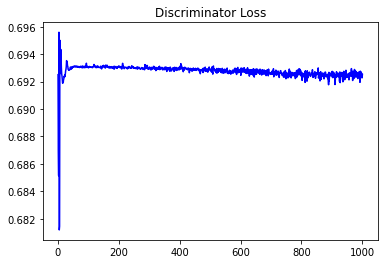

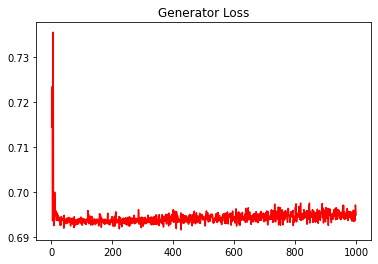

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14176512143268574


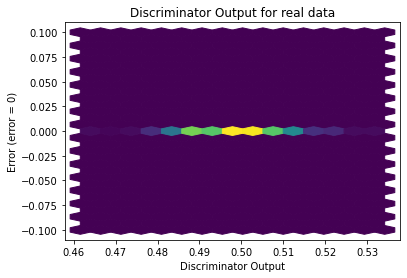

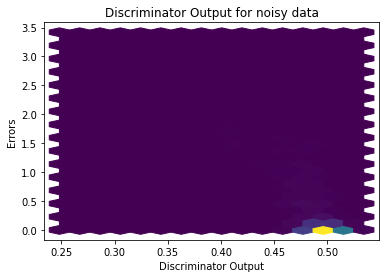

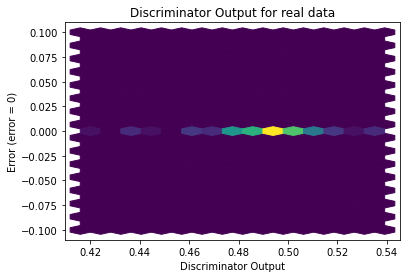

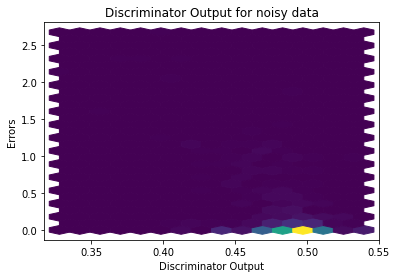

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


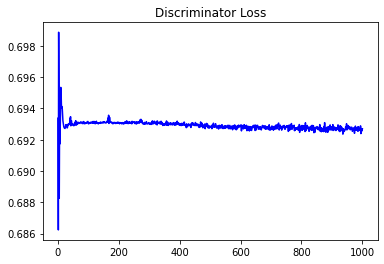

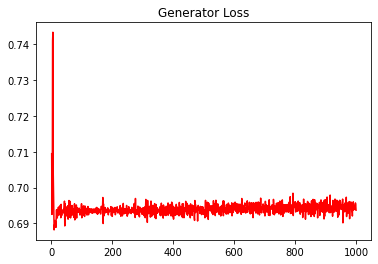

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14658778372703754


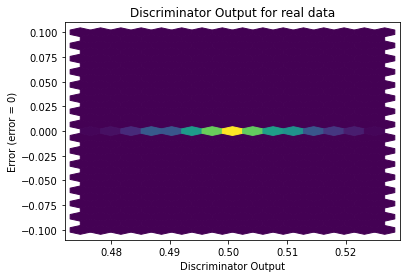

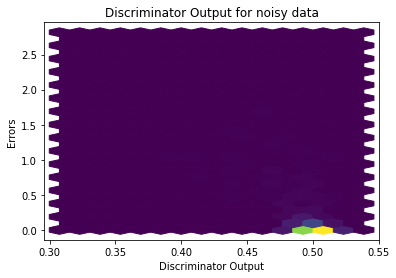

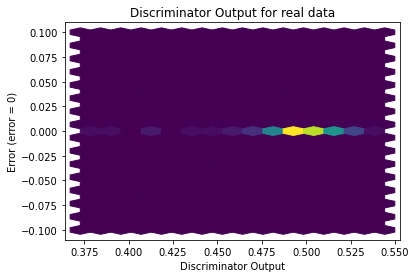

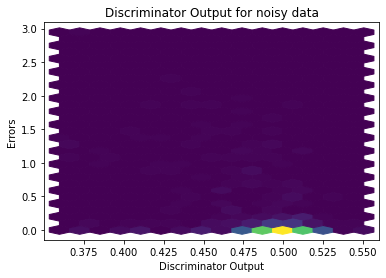

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5505]], requires_grad=True)
